# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 69181.30 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 96933.02 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 117067.80 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 130327.89 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 134074.44 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 70388.90 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 109603.78 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 127340.04 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 139219.01 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 145808.92 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 150456.23 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.40 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.88 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.66 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.07 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 50.57 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.64 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.54 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.58 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.54 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.98 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.13 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.62 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.17 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.59 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.01 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.07 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.07 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.75 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.06 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.76 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.18 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 41.53 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 45.65 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.29 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 47.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.66 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.51 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.70 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.77 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 34.41 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.05 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.88 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 34.68 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.23 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.43 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 46.10 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.70 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.27 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.04 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.86 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.00 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.63 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.42 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.80 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.21 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.74 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.96 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.11 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.06 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.34 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.04 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.72 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.21 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.00 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.90 examples/s]

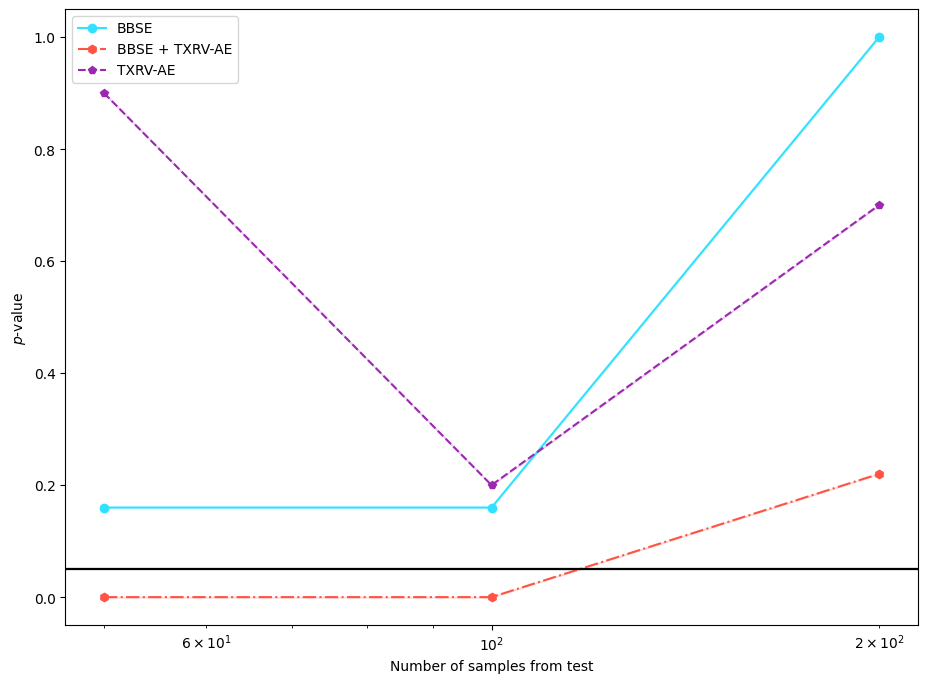

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.40 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.96 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.29 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.11 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.42 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.51 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.91 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.98 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.89 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.55 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.57 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.80 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.05 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.51 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.14 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.96 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.05 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.14 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.52 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.30 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.01 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.65 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.43 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.15 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.71 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.70 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.00 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.56 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.24 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.82 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.27 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.05 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.42 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.59 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.52 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.47 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.44 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.93 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.75 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.77 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.34 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.19 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.59 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.91 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.25 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.16 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.84 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.72 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.46 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.39 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.04 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.58 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.13 examples/s]

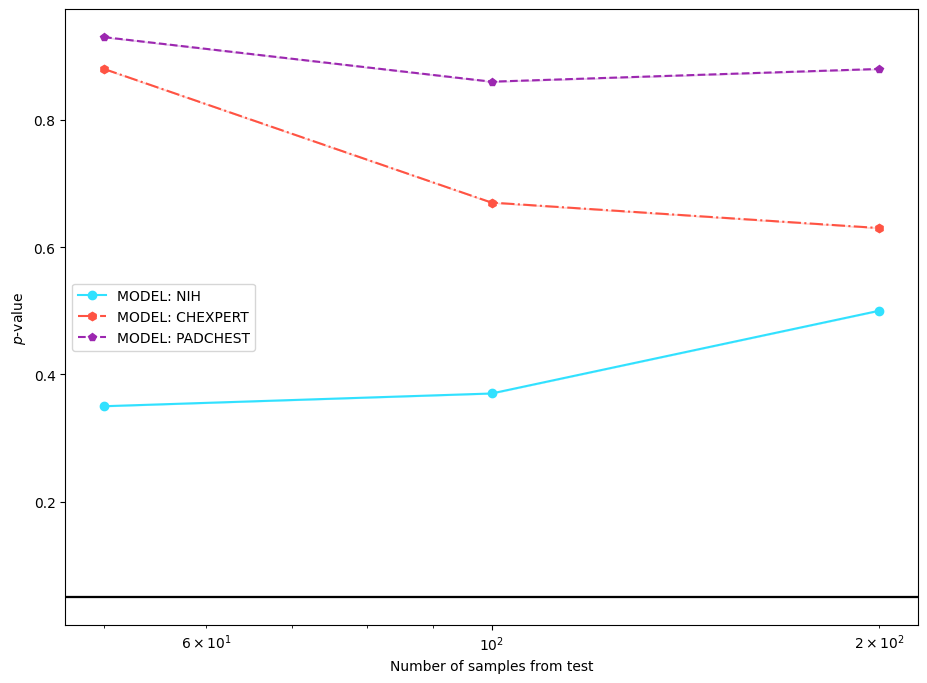

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55630.01 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75171.39 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83390.28 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 93570.27 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96531.89 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 102488.55 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52502.62 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75705.07 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 88826.29 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 96335.71 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101024.55 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 104609.41 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.30 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.99 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.51 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.40 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.36 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.49 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.89 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.59 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.33 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.89 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.07 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.86 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.19 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.98 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.33 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.06 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.77 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.77 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51575.18 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71178.34 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 87311.44 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 94684.05 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98568.21 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 100127.46 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49136.59 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72565.81 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85618.43 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89944.15 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 99715.12 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 103507.43 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.35 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.07 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.30 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.58 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.28 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.21 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.98 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.81 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.79 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.62 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.06 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.04 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.96 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.63 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.00 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.15 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.08 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.43 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.23 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53436.62 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76391.98 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 88259.86 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 95470.89 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 97784.21 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 102252.79 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 46954.43 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 67032.14 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 78173.13 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87243.28 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 99562.13 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109719.79 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.43 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.84 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.74 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.69 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.70 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.70 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.19 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.55 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.88 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.95 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.54 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.92 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.47 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.20 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.90 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.36 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.31 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.84 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.63 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50773.70 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 70137.98 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 80027.00 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87523.76 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98547.50 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 105882.45 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48115.24 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71193.61 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86411.26 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92750.14 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96853.31 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 100614.25 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.76 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.02 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.78 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.15 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.12 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.41 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.81 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.28 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.00 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.42 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.72 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.70 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.82 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.52 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.99 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.51 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.50 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.32 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.30 examples/s]

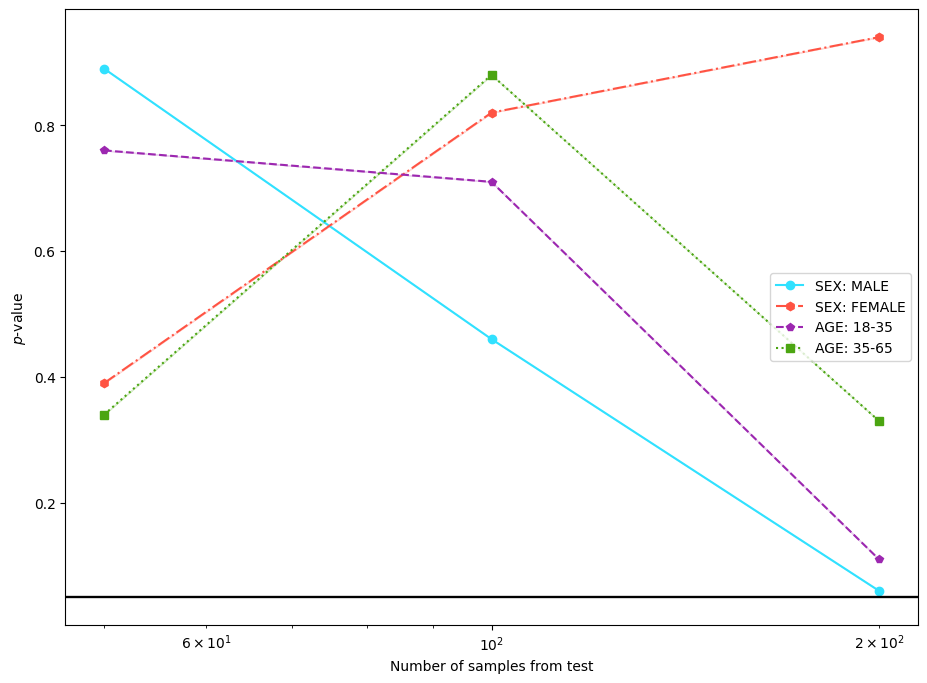

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.62 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.91 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.44 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.51 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.69 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.92 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.40 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.76 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.87 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.87 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.62 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.32 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.49 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.61 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.12 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.25 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.23 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.17 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.52 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.39 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.87 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.13 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.20 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.22 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.19 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.21 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.25 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.34 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.58 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.73 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.23 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.41 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.22 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.98 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.11 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.32 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.78 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.92 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.68 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.18 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.70 examples/s]

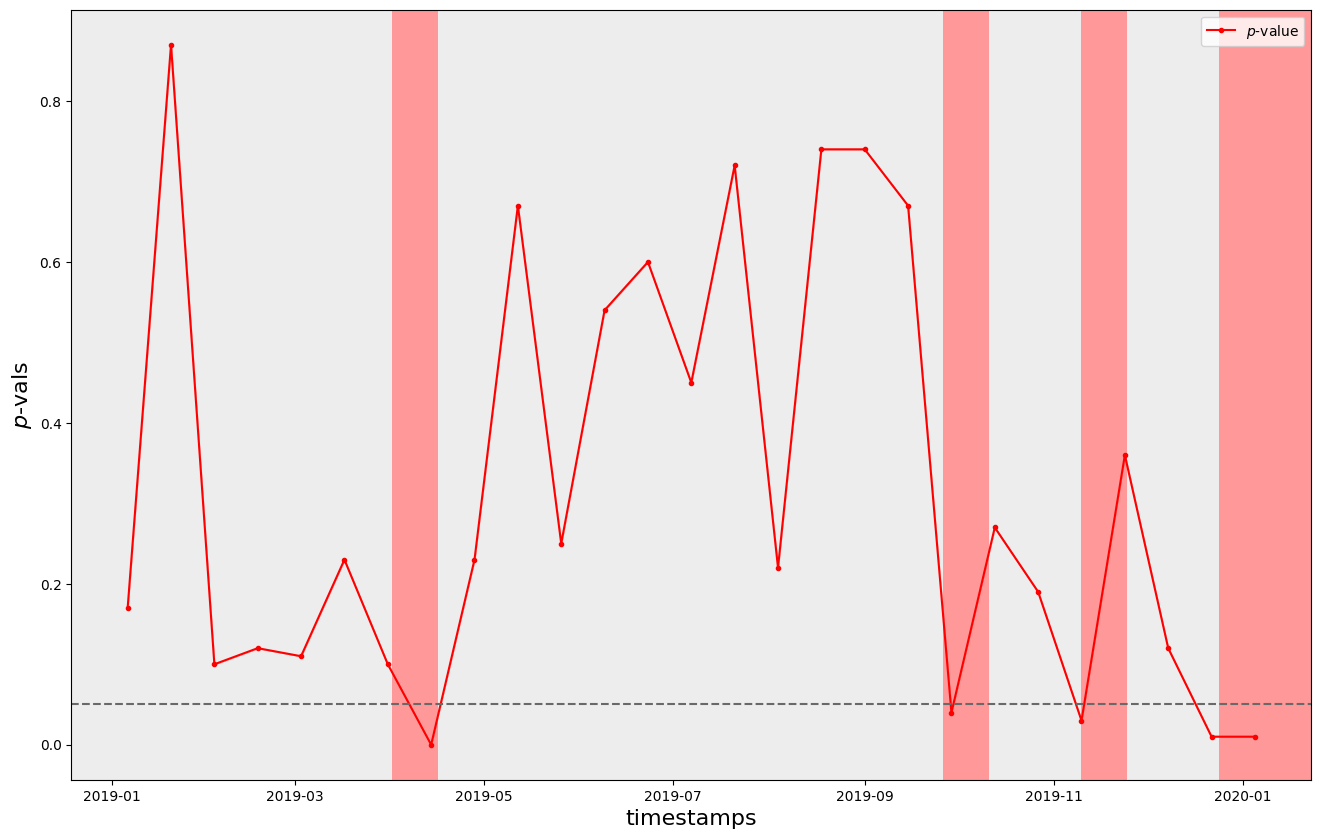

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)